In [1]:
# !pip install pytorch-nlp
import torch
from torchnlp.encoders.text import WhitespaceEncoder
from torchnlp.word_to_vector import GloVe

In [2]:
from numpy import array
from pickle import dump
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Flatten
from keras import optimizers
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import one_hot
from numpy import zeros

Using TensorFlow backend.


In [139]:
# link = 'https://drive.google.com/open?id=1zDA2HPNkEwGgI0Jhwx4NFGDXN2ORilb8'
# fluff, id = link.split('=')
# print (id)
# downloaded = drive.CreateFile({'id':id}) 
# downloaded.GetContentFile('train.txt')  
# open the file as read only
file = open('train.txt', 'r', encoding="utf8")
# read all text
doc = file.read()
# close the file
file.close()

In [140]:
import string
# replace '--' with a space ' '
doc = doc.replace('--', ' ')
# split into tokens by white space
tokens = doc.split()
# remove punctuation from each token
table = str.maketrans('', '', string.punctuation)
tokens = [w.translate(table) for w in tokens]
# remove remaining tokens that are not alphabetic
tokens = [word for word in tokens if word.isalpha()]
# make lower case
tokens = [word.lower() for word in tokens]

In [141]:
word_counter = {}
tokens = tokens[:int(8*len(tokens)/10)]
for word in tokens:
    if word in word_counter:
        word_counter[word] += 1
    else:
        word_counter[word] = 1

popular_words = sorted(word_counter, key = word_counter.get, reverse = True)

vocab = popular_words[:1500]
vocab.append('unk')


In [142]:
length = 2 + 1 # 4 word for input and 1 word for output
sequences = list()
labels = []
for i in range(length, int(len(tokens))):
    # select sequence of tokens
    seq = [] 
#     if tokens[i-5] in vocab :
#         seq.append(tokens[i-5])
#     else :
#         seq.append('unk')
#     if tokens[i-4] in vocab :
#         seq.append(tokens[i-4])
#     else :
#         seq.append('unk')
    if tokens[i-3] in vocab :
        seq.append(tokens[i-3])
    else :
        seq.append('unk')
    if tokens[i-2] in vocab :
        seq.append(tokens[i-2])
    else :
        seq.append('unk')
#     seq=tokens[i-5:i-1]
    # convert into a line
    line = ' '.join(seq)
    # store
    sequences.append(line)
    if tokens[i-1] in vocab :
        labels.append(tokens[i-1])
    else :
        labels.append('unk')
print('Total Sequences: %d' % len(sequences))

Total Sequences: 655661


In [143]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sequences)
ensequences = tokenizer.texts_to_sequences(sequences)
tokenizer2 = Tokenizer()
tokenizer2.fit_on_texts(labels)
enlabels = tokenizer.texts_to_sequences(labels)

In [144]:
padsequences = pad_sequences(ensequences, maxlen=2, padding='post')

In [145]:
vocab_size = len(vocab) + 1
vocab_size

1502

In [146]:
catlabel = to_categorical(enlabels, num_classes=vocab_size)
padcatlabels = pad_sequences(catlabel, padding='post')

In [147]:
padsequences.shape

(655661, 2)

In [17]:
pretrained_embedding = GloVe(name='6B', dim=50)

In [18]:
embedding_weights = zeros((vocab_size, 50))
for word, i in tokenizer.word_index.items():
    embedding_weights[i] = pretrained_embedding[word]

In [148]:
from keras import layers
model = Sequential()
#using GloVe part 1
model.add(Embedding(vocab_size, 50 , weights=[embedding_weights], input_length=2))
#without GloVe part 2
# model.add(Embedding(vocab_size, 50, input_length=3))
model.add(Dense(35, activation='tanh'))
model.add(layers.Dropout(0.5))
model.add(Flatten())
model.add(Dense(vocab_size, activation='softmax'))
# compile the model
sgd = optimizers.SGD(lr=0.02,nesterov=True)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 2, 50)             75100     
_________________________________________________________________
dense_27 (Dense)             (None, 2, 35)             1785      
_________________________________________________________________
dropout_14 (Dropout)         (None, 2, 35)             0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 70)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 1502)              106642    
Total params: 183,527
Trainable params: 183,527
Non-trainable params: 0
_________________________________________________________________
None


In [149]:
file = open('test.txt', 'r', encoding="utf8")
# read all text
doc = file.read()
# close the file
file.close()

In [150]:
import string
# replace '--' with a space ' '
doc = doc.replace('--', ' ')
# split into tokens by white space
tokens = doc.split()
# remove punctuation from each token
table = str.maketrans('', '', string.punctuation)
tokens = [w.translate(table) for w in tokens]
# remove remaining tokens that are not alphabetic
tokens = [word for word in tokens if word.isalpha()]
# make lower case
tokens = [word.lower() for word in tokens]

In [152]:
length = 2 + 1 # 4 word for input and 1 word for output
testsequences = list()
testlabels = []
for i in range(length, int(len(tokens))):
    # select sequence of tokens
    seq = [] 
#     if tokens[i-5] in vocab :
#         seq.append(tokens[i-5])
#     else :
#         seq.append('unk')
#     if tokens[i-4] in vocab :
#         seq.append(tokens[i-4])
#     else :
#         seq.append('unk')
    if tokens[i-3] in vocab :
        seq.append(tokens[i-3])
    else :
        seq.append('unk')
    if tokens[i-2] in vocab :
        seq.append(tokens[i-2])
    else :
        seq.append('unk')
    # convert into a line
    line = ' '.join(seq)
    # store
    testsequences.append(line)
    if tokens[i-1] in vocab :
        testlabels.append(tokens[i-1])
    else :
        testlabels.append('unk')
print('Total Sequences: %d' % len(testsequences))

Total Sequences: 19591


In [153]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(testsequences)
ensequences = tokenizer.texts_to_sequences(testsequences)
tokenizer2 = Tokenizer()
tokenizer2.fit_on_texts(testlabels)
enlabels = tokenizer.texts_to_sequences(testlabels)

In [154]:
padtestsequences = pad_sequences(ensequences, maxlen=2, padding='post')
cattestlabel = to_categorical(enlabels, num_classes=vocab_size)
padcattestlabels = pad_sequences(cattestlabel, padding='post')

In [155]:
padcattestlabels.shape

(19591, 1502)

In [156]:
padtestsequences.shape

(19591, 2)

In [157]:
# fit the model
trained_model = model.fit(padsequences, padcatlabels,batch_size=6000, epochs=10, verbose=1,validation_data=(padtestsequences,padcattestlabels))
# model.save("model2.h5")
# print("Saved model to disk")

Train on 655661 samples, validate on 19591 samples
Epoch 1/10
655661/655661 [==============================] - ETA: 1:03:11 - loss: 0.0055 - acc: 0.99 - ETA: 42:01 - loss: 0.0055 - acc: 0.9993 - ETA: 28:18 - loss: 0.0055 - acc: 0.99 - ETA: 22:52 - loss: 0.0055 - acc: 0.99 - ETA: 18:25 - loss: 0.0055 - acc: 0.99 - ETA: 15:27 - loss: 0.0055 - acc: 0.99 - ETA: 13:23 - loss: 0.0055 - acc: 0.99 - ETA: 11:49 - loss: 0.0055 - acc: 0.99 - ETA: 10:36 - loss: 0.0055 - acc: 0.99 - ETA: 9:35 - loss: 0.0055 - acc: 0.9993 - ETA: 8:45 - loss: 0.0055 - acc: 0.999 - ETA: 8:03 - loss: 0.0055 - acc: 0.999 - ETA: 7:28 - loss: 0.0055 - acc: 0.999 - ETA: 6:58 - loss: 0.0055 - acc: 0.999 - ETA: 6:31 - loss: 0.0055 - acc: 0.999 - ETA: 6:08 - loss: 0.0055 - acc: 0.999 - ETA: 5:47 - loss: 0.0055 - acc: 0.999 - ETA: 5:29 - loss: 0.0055 - acc: 0.999 - ETA: 5:13 - loss: 0.0055 - acc: 0.999 - ETA: 4:58 - loss: 0.0055 - acc: 0.999 - ETA: 4:44 - loss: 0.0055 - acc: 0.999 - ETA: 4:31 - loss: 0.0055 - acc: 0.999 - ETA:

655661/655661 [==============================] - ETA: 1:44 - loss: 0.0055 - acc: 0.999 - ETA: 1:34 - loss: 0.0055 - acc: 0.999 - ETA: 1:29 - loss: 0.0055 - acc: 0.999 - ETA: 1:25 - loss: 0.0055 - acc: 0.999 - ETA: 1:23 - loss: 0.0055 - acc: 0.999 - ETA: 1:22 - loss: 0.0055 - acc: 0.999 - ETA: 1:20 - loss: 0.0055 - acc: 0.999 - ETA: 1:19 - loss: 0.0055 - acc: 0.999 - ETA: 1:18 - loss: 0.0055 - acc: 0.999 - ETA: 1:17 - loss: 0.0055 - acc: 0.999 - ETA: 1:17 - loss: 0.0055 - acc: 0.999 - ETA: 1:16 - loss: 0.0055 - acc: 0.999 - ETA: 1:15 - loss: 0.0055 - acc: 0.999 - ETA: 1:14 - loss: 0.0055 - acc: 0.999 - ETA: 1:13 - loss: 0.0055 - acc: 0.999 - ETA: 1:12 - loss: 0.0055 - acc: 0.999 - ETA: 1:12 - loss: 0.0055 - acc: 0.999 - ETA: 1:11 - loss: 0.0055 - acc: 0.999 - ETA: 1:10 - loss: 0.0055 - acc: 0.999 - ETA: 1:09 - loss: 0.0055 - acc: 0.999 - ETA: 1:08 - loss: 0.0055 - acc: 0.999 - ETA: 1:08 - loss: 0.0055 - acc: 0.999 - ETA: 1:07 - loss: 0.0055 - acc: 0.999 - ETA: 1:06 - loss: 0.0055 - acc:

655661/655661 [==============================] - ETA: 2:20 - loss: 0.0055 - acc: 0.999 - ETA: 1:50 - loss: 0.0055 - acc: 0.999 - ETA: 1:39 - loss: 0.0055 - acc: 0.999 - ETA: 1:33 - loss: 0.0055 - acc: 0.999 - ETA: 1:29 - loss: 0.0055 - acc: 0.999 - ETA: 1:27 - loss: 0.0055 - acc: 0.999 - ETA: 1:26 - loss: 0.0055 - acc: 0.999 - ETA: 1:24 - loss: 0.0055 - acc: 0.999 - ETA: 1:23 - loss: 0.0055 - acc: 0.999 - ETA: 1:21 - loss: 0.0055 - acc: 0.999 - ETA: 1:20 - loss: 0.0055 - acc: 0.999 - ETA: 1:19 - loss: 0.0055 - acc: 0.999 - ETA: 1:17 - loss: 0.0055 - acc: 0.999 - ETA: 1:16 - loss: 0.0055 - acc: 0.999 - ETA: 1:15 - loss: 0.0055 - acc: 0.999 - ETA: 1:14 - loss: 0.0055 - acc: 0.999 - ETA: 1:13 - loss: 0.0055 - acc: 0.999 - ETA: 1:12 - loss: 0.0055 - acc: 0.999 - ETA: 1:11 - loss: 0.0055 - acc: 0.999 - ETA: 1:10 - loss: 0.0055 - acc: 0.999 - ETA: 1:09 - loss: 0.0055 - acc: 0.999 - ETA: 1:08 - loss: 0.0055 - acc: 0.999 - ETA: 1:08 - loss: 0.0055 - acc: 0.999 - ETA: 1:07 - loss: 0.0055 - acc:

655661/655661 [==============================] - ETA: 1:27 - loss: 0.0055 - acc: 0.999 - ETA: 1:22 - loss: 0.0055 - acc: 0.999 - ETA: 1:21 - loss: 0.0055 - acc: 0.999 - ETA: 1:20 - loss: 0.0055 - acc: 0.999 - ETA: 1:19 - loss: 0.0055 - acc: 0.999 - ETA: 1:18 - loss: 0.0055 - acc: 0.999 - ETA: 1:17 - loss: 0.0055 - acc: 0.999 - ETA: 1:16 - loss: 0.0055 - acc: 0.999 - ETA: 1:16 - loss: 0.0055 - acc: 0.999 - ETA: 1:15 - loss: 0.0055 - acc: 0.999 - ETA: 1:14 - loss: 0.0055 - acc: 0.999 - ETA: 1:13 - loss: 0.0055 - acc: 0.999 - ETA: 1:12 - loss: 0.0055 - acc: 0.999 - ETA: 1:11 - loss: 0.0055 - acc: 0.999 - ETA: 1:11 - loss: 0.0055 - acc: 0.999 - ETA: 1:10 - loss: 0.0055 - acc: 0.999 - ETA: 1:09 - loss: 0.0055 - acc: 0.999 - ETA: 1:08 - loss: 0.0055 - acc: 0.999 - ETA: 1:08 - loss: 0.0055 - acc: 0.999 - ETA: 1:07 - loss: 0.0055 - acc: 0.999 - ETA: 1:06 - loss: 0.0055 - acc: 0.999 - ETA: 1:05 - loss: 0.0055 - acc: 0.999 - ETA: 1:04 - loss: 0.0055 - acc: 0.999 - ETA: 1:04 - loss: 0.0055 - acc:

655661/655661 [==============================] - ETA: 1:34 - loss: 0.0055 - acc: 0.999 - ETA: 1:26 - loss: 0.0055 - acc: 0.999 - ETA: 1:23 - loss: 0.0055 - acc: 0.999 - ETA: 1:21 - loss: 0.0055 - acc: 0.999 - ETA: 1:19 - loss: 0.0055 - acc: 0.999 - ETA: 1:18 - loss: 0.0055 - acc: 0.999 - ETA: 1:17 - loss: 0.0055 - acc: 0.999 - ETA: 1:16 - loss: 0.0055 - acc: 0.999 - ETA: 1:15 - loss: 0.0055 - acc: 0.999 - ETA: 1:14 - loss: 0.0055 - acc: 0.999 - ETA: 1:13 - loss: 0.0055 - acc: 0.999 - ETA: 1:13 - loss: 0.0055 - acc: 0.999 - ETA: 1:12 - loss: 0.0055 - acc: 0.999 - ETA: 1:11 - loss: 0.0055 - acc: 0.999 - ETA: 1:10 - loss: 0.0055 - acc: 0.999 - ETA: 1:09 - loss: 0.0055 - acc: 0.999 - ETA: 1:09 - loss: 0.0055 - acc: 0.999 - ETA: 1:08 - loss: 0.0055 - acc: 0.999 - ETA: 1:07 - loss: 0.0055 - acc: 0.999 - ETA: 1:06 - loss: 0.0055 - acc: 0.999 - ETA: 1:05 - loss: 0.0055 - acc: 0.999 - ETA: 1:05 - loss: 0.0055 - acc: 0.999 - ETA: 1:04 - loss: 0.0055 - acc: 0.999 - ETA: 1:03 - loss: 0.0055 - acc:

655661/655661 [==============================] - ETA: 1:19 - loss: 0.0055 - acc: 0.999 - ETA: 1:19 - loss: 0.0055 - acc: 0.999 - ETA: 1:18 - loss: 0.0055 - acc: 0.999 - ETA: 1:17 - loss: 0.0055 - acc: 0.999 - ETA: 1:16 - loss: 0.0055 - acc: 0.999 - ETA: 1:16 - loss: 0.0055 - acc: 0.999 - ETA: 1:15 - loss: 0.0055 - acc: 0.999 - ETA: 1:14 - loss: 0.0055 - acc: 0.999 - ETA: 1:14 - loss: 0.0055 - acc: 0.999 - ETA: 1:13 - loss: 0.0055 - acc: 0.999 - ETA: 1:12 - loss: 0.0055 - acc: 0.999 - ETA: 1:11 - loss: 0.0055 - acc: 0.999 - ETA: 1:11 - loss: 0.0055 - acc: 0.999 - ETA: 1:10 - loss: 0.0055 - acc: 0.999 - ETA: 1:09 - loss: 0.0055 - acc: 0.999 - ETA: 1:09 - loss: 0.0055 - acc: 0.999 - ETA: 1:08 - loss: 0.0055 - acc: 0.999 - ETA: 1:07 - loss: 0.0055 - acc: 0.999 - ETA: 1:06 - loss: 0.0055 - acc: 0.999 - ETA: 1:06 - loss: 0.0055 - acc: 0.999 - ETA: 1:05 - loss: 0.0055 - acc: 0.999 - ETA: 1:04 - loss: 0.0055 - acc: 0.999 - ETA: 1:03 - loss: 0.0055 - acc: 0.999 - ETA: 1:03 - loss: 0.0055 - acc:

655661/655661 [==============================] - ETA: 1:27 - loss: 0.0055 - acc: 0.999 - ETA: 1:22 - loss: 0.0055 - acc: 0.999 - ETA: 1:20 - loss: 0.0055 - acc: 0.999 - ETA: 1:19 - loss: 0.0055 - acc: 0.999 - ETA: 1:17 - loss: 0.0055 - acc: 0.999 - ETA: 1:17 - loss: 0.0055 - acc: 0.999 - ETA: 1:16 - loss: 0.0055 - acc: 0.999 - ETA: 1:15 - loss: 0.0055 - acc: 0.999 - ETA: 1:14 - loss: 0.0055 - acc: 0.999 - ETA: 1:13 - loss: 0.0055 - acc: 0.999 - ETA: 1:13 - loss: 0.0055 - acc: 0.999 - ETA: 1:12 - loss: 0.0055 - acc: 0.999 - ETA: 1:11 - loss: 0.0055 - acc: 0.999 - ETA: 1:10 - loss: 0.0055 - acc: 0.999 - ETA: 1:09 - loss: 0.0055 - acc: 0.999 - ETA: 1:09 - loss: 0.0055 - acc: 0.999 - ETA: 1:08 - loss: 0.0055 - acc: 0.999 - ETA: 1:07 - loss: 0.0055 - acc: 0.999 - ETA: 1:07 - loss: 0.0055 - acc: 0.999 - ETA: 1:06 - loss: 0.0055 - acc: 0.999 - ETA: 1:05 - loss: 0.0055 - acc: 0.999 - ETA: 1:04 - loss: 0.0055 - acc: 0.999 - ETA: 1:03 - loss: 0.0055 - acc: 0.999 - ETA: 1:03 - loss: 0.0055 - acc:

655661/655661 [==============================] - ETA: 1:21 - loss: 0.0055 - acc: 0.999 - ETA: 1:21 - loss: 0.0055 - acc: 0.999 - ETA: 1:20 - loss: 0.0055 - acc: 0.999 - ETA: 1:18 - loss: 0.0055 - acc: 0.999 - ETA: 1:17 - loss: 0.0055 - acc: 0.999 - ETA: 1:16 - loss: 0.0055 - acc: 0.999 - ETA: 1:16 - loss: 0.0055 - acc: 0.999 - ETA: 1:14 - loss: 0.0055 - acc: 0.999 - ETA: 1:14 - loss: 0.0055 - acc: 0.999 - ETA: 1:13 - loss: 0.0055 - acc: 0.999 - ETA: 1:12 - loss: 0.0055 - acc: 0.999 - ETA: 1:11 - loss: 0.0055 - acc: 0.999 - ETA: 1:10 - loss: 0.0055 - acc: 0.999 - ETA: 1:09 - loss: 0.0055 - acc: 0.999 - ETA: 1:09 - loss: 0.0055 - acc: 0.999 - ETA: 1:08 - loss: 0.0055 - acc: 0.999 - ETA: 1:07 - loss: 0.0055 - acc: 0.999 - ETA: 1:07 - loss: 0.0055 - acc: 0.999 - ETA: 1:06 - loss: 0.0055 - acc: 0.999 - ETA: 1:05 - loss: 0.0055 - acc: 0.999 - ETA: 1:04 - loss: 0.0055 - acc: 0.999 - ETA: 1:04 - loss: 0.0055 - acc: 0.999 - ETA: 1:03 - loss: 0.0055 - acc: 0.999 - ETA: 1:02 - loss: 0.0055 - acc:

655661/655661 [==============================] - ETA: 1:21 - loss: 0.0055 - acc: 0.999 - ETA: 1:18 - loss: 0.0055 - acc: 0.999 - ETA: 1:18 - loss: 0.0055 - acc: 0.999 - ETA: 1:17 - loss: 0.0055 - acc: 0.999 - ETA: 1:16 - loss: 0.0055 - acc: 0.999 - ETA: 1:15 - loss: 0.0055 - acc: 0.999 - ETA: 1:14 - loss: 0.0055 - acc: 0.999 - ETA: 1:14 - loss: 0.0055 - acc: 0.999 - ETA: 1:13 - loss: 0.0055 - acc: 0.999 - ETA: 1:12 - loss: 0.0055 - acc: 0.999 - ETA: 1:12 - loss: 0.0055 - acc: 0.999 - ETA: 1:11 - loss: 0.0055 - acc: 0.999 - ETA: 1:10 - loss: 0.0055 - acc: 0.999 - ETA: 1:09 - loss: 0.0055 - acc: 0.999 - ETA: 1:09 - loss: 0.0055 - acc: 0.999 - ETA: 1:08 - loss: 0.0055 - acc: 0.999 - ETA: 1:07 - loss: 0.0055 - acc: 0.999 - ETA: 1:06 - loss: 0.0055 - acc: 0.999 - ETA: 1:06 - loss: 0.0055 - acc: 0.999 - ETA: 1:05 - loss: 0.0055 - acc: 0.999 - ETA: 1:04 - loss: 0.0055 - acc: 0.999 - ETA: 1:03 - loss: 0.0055 - acc: 0.999 - ETA: 1:03 - loss: 0.0055 - acc: 0.999 - ETA: 1:02 - loss: 0.0055 - acc:

655661/655661 [==============================] - ETA: 1:22 - loss: 0.0055 - acc: 0.999 - ETA: 1:24 - loss: 0.0055 - acc: 0.999 - ETA: 1:24 - loss: 0.0055 - acc: 0.999 - ETA: 1:22 - loss: 0.0055 - acc: 0.999 - ETA: 1:20 - loss: 0.0055 - acc: 0.999 - ETA: 1:18 - loss: 0.0055 - acc: 0.999 - ETA: 1:17 - loss: 0.0055 - acc: 0.999 - ETA: 1:16 - loss: 0.0055 - acc: 0.999 - ETA: 1:15 - loss: 0.0055 - acc: 0.999 - ETA: 1:15 - loss: 0.0055 - acc: 0.999 - ETA: 1:14 - loss: 0.0055 - acc: 0.999 - ETA: 1:13 - loss: 0.0055 - acc: 0.999 - ETA: 1:12 - loss: 0.0055 - acc: 0.999 - ETA: 1:11 - loss: 0.0055 - acc: 0.999 - ETA: 1:10 - loss: 0.0055 - acc: 0.999 - ETA: 1:10 - loss: 0.0055 - acc: 0.999 - ETA: 1:09 - loss: 0.0055 - acc: 0.999 - ETA: 1:08 - loss: 0.0055 - acc: 0.999 - ETA: 1:07 - loss: 0.0055 - acc: 0.999 - ETA: 1:07 - loss: 0.0055 - acc: 0.999 - ETA: 1:06 - loss: 0.0055 - acc: 0.999 - ETA: 1:05 - loss: 0.0055 - acc: 0.999 - ETA: 1:04 - loss: 0.0055 - acc: 0.999 - ETA: 1:03 - loss: 0.0055 - acc:

In [ ]:
model = load_model('model2.h5')
# summarize model.
model.summary()

In [158]:
history=trained_model.history

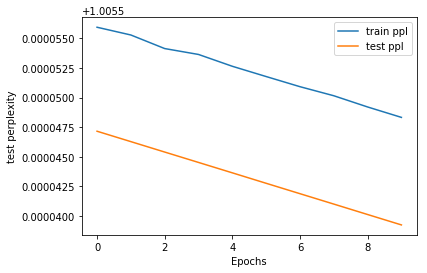

In [159]:
import matplotlib.pyplot as plt
import numpy as np
import math
# history=network.history
loss=history['loss']
val_loss=history['val_loss']
ppl=[math.exp(d) for d in loss]
ppl_test=[math.exp(d) for d in val_loss]
plt.xlabel('Epochs')
plt.ylabel('train perplexity')
plt.plot(ppl)

plt.xlabel('Epochs')
plt.ylabel('test perplexity')
plt.plot(ppl_test)
plt.legend(['train ppl','test ppl'])

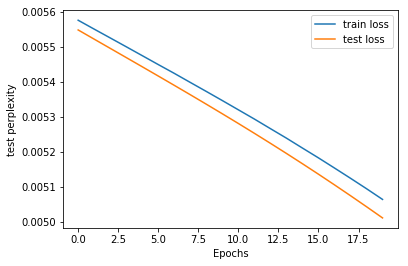

In [55]:
loss=history['loss']
val_loss=history['val_loss']
plt.xlabel('Epochs')
plt.ylabel('train perplexity')
plt.plot(loss)

plt.xlabel('Epochs')
plt.ylabel('test perplexity')
plt.plot(val_loss)
plt.legend(['train loss','test loss'])

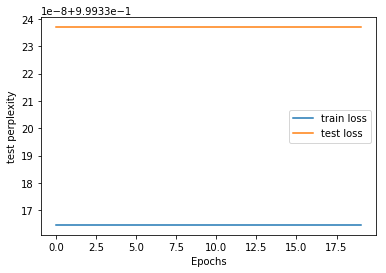

In [57]:
loss=history['acc']
val_loss=history['val_acc']
plt.xlabel('Epochs')
plt.ylabel('train perplexity')
plt.plot(loss)

plt.xlabel('Epochs')
plt.ylabel('test perplexity')
plt.plot(val_loss)
plt.legend(['train loss','test loss'])

In [160]:
loss,acc = model.evaluate(padtestsequences,padcattestlabels)

19591/19591 [==============================] - ETA: 3: - ETA: 25s - ETA: 16 - ETA: 10 - ETA: 7 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 3s 158us/step


In [161]:
print('loss = ',loss,'acc = ',acc)

loss =  0.00552396107219541 acc =  0.9993342757012065
